# Project: Investigate a Dataset - [TMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction

#### Dataset Description

The dataset used is the TMDb movie data. Which is a dataset of about 10,000 movies from The Movie Database, including user rating and revenue.

#### Questions for Analysis

- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?

<a id='wrangling'></a>
### Data Wrangling

In this section of the report, the data needed for analysis is prepared. This will include loading in the data and checking the contents of the data.


In [1]:
#Importing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# !pip install --upgrade pandas==0.25.0

In [3]:
#Reading in the data
df = pd.read_csv('tmdb-movies.csv')

In [4]:
# Viewing first five rows of the dataset
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Viewing the columns in the dataset
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Next, We perform the exploratory data analysis to answer the aforementioned questions.

<a id='eda'></a>
### Exploratory Data Analysis
This section of the report delves into the main analysis and seeks to address and answer the proposed research questions in the Introduction section. 

Question 1: Which genres are most popular from year to year?

To answer this question, we are going to begin by getting the list of all unique genres in the dataset. We are going to get these and store it in the variable `all_genres` below.

In [6]:
all_genres_array = [i for i in df['genres'] if type(i) == str]
all_genres_array = '|'.join(all_genres_array).split('|')
all_genres = list(set(all_genres_array))

In [7]:
all_genres

['Animation',
 'Music',
 'Science Fiction',
 'TV Movie',
 'History',
 'Mystery',
 'Western',
 'Horror',
 'Foreign',
 'Documentary',
 'Drama',
 'Adventure',
 'War',
 'Family',
 'Thriller',
 'Action',
 'Comedy',
 'Fantasy',
 'Romance',
 'Crime']

Next, we are going to get all the indices of the rows where each of these genres exist in `df`. The indices of each genre will be stored in a dictionary, called `genre_indices`. The key of this dictionary `genre_indices` will be the distince genre names in `all_genres`.

In [8]:
def split_func(x):
    if type(x) == str:
        return x.split('|')
    else:
        return '-'

split_genres = [split_func(i) for i in df['genres']]

genre_indices = dict()

for genre in all_genres:
    indices = [i for i in range(len(split_genres)) if genre in split_genres[i]]
    genre_indices[genre] = indices

We are then going to use the data gotten from the previous cell to extract the number of times each genre of movie was released for each year. This data will be stored in a dictionary called `genre_years_dict`.

The function `convert_year` will be used to convert the year which only has two last numbers (YY) to a year format with the full complete four numbers (YYYY).

In [9]:
def convert_year(x):
    str_year = x[-2:]
    int_year = int(str_year)
    if int_year <= 22:
        str_year = '20'+str_year
    else:
        str_year = '19'+str_year
    return int(str_year)

release_year = df['release_date'].apply(convert_year)
min_year, max_year = release_year.min(), release_year.max()

print('Minimum year:', min_year)
print('Maximum year:', max_year)

genre_years_dict = dict()

for genre in genre_indices:
    genre_df = df.iloc[genre_indices[genre]]
    genre_year = genre_df['release_date'].apply(convert_year)
    year_counts = genre_year.value_counts()
    year_each = year_counts.index
    year_count_each = year_counts.values
    year_count_dict = dict(zip(year_each, year_count_each))
    for year in range(min_year, max_year+1):
        try_if_year_exists = year_count_dict.get(year, '----')
        if try_if_year_exists == '----':
            year_count_dict[year] = 0
    genre_years_dict[genre] = year_count_dict

Minimum year: 1960
Maximum year: 2015


As can be seen from above, the years in the dataset range from 1960 to 2015.

Next, we plot bar charts to show the yearly trend for each year. Each bar chart will show the number of movies released for each year under that genre.

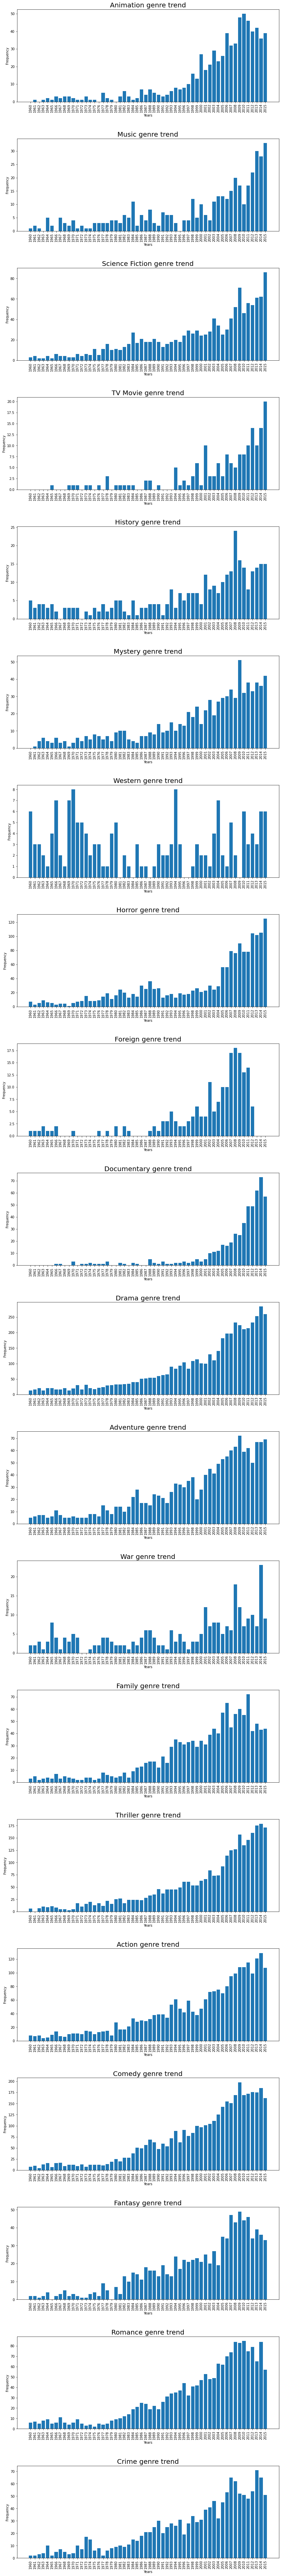

In [10]:
n_genres = len(all_genres)

fig, ax = plt.subplots(nrows=n_genres, ncols=1, figsize=(14, int(7*n_genres)))
plt.subplots_adjust(hspace=0.4)

for i in range(n_genres):
    genre = all_genres[i]
    years = genre_years_dict[genre].keys()
    years = list(years)
    years.sort()
    counts = [genre_years_dict[genre][i] for i in years]
    
    ax[i].bar(years, counts)
    ax[i].set_title(f'{genre} genre trend', fontsize='20')
    ax[i].set_xlabel('Years')
    ax[i].set_ylabel('Frequency')
    ax[i].set_xticks(years)
    ax[i].set_xticklabels(years, rotation=90)

plt.show()

Next we will be plotting all the previous bar charts together, to allow them overlap so that we can see how the trends relate with each other vaguely.

This next plot **doesn't really tell much** other than to show which genre is most common.

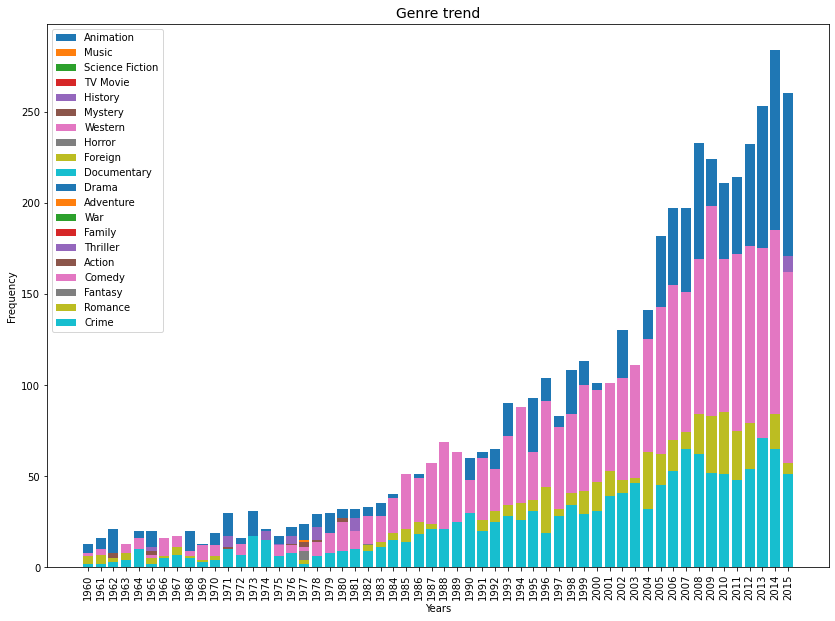

In [11]:
n_genres = len(all_genres)

plt.figure(figsize=(14, 10))

for i in range(n_genres):
    genre = all_genres[i]
    years = genre_years_dict[genre].keys()
    years = list(years)
    years.sort()
    counts = [genre_years_dict[genre][i] for i in years]
    
    plt.bar(years, counts)
plt.title('Genre trend', fontsize='14')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend(all_genres)
plt.xticks(years, rotation=90)

plt.show()

The previous plot shows that Drama is often the most popular genre year on year.

The best way to see that the Drama genre is the most popular, year on year is to show this in a DataFrame `trend_df`, with two columns, containing the year and most popular genre for each year.

In [12]:
years = []
genres = []

for year in range(min_year, max_year+1):
    counts = [genre_years_dict[genre][year] for genre in all_genres]
    max_count_value = max(counts)
    if counts.count(max_count_value) > 1:
        indices = [i for i in range(len(counts)) if counts[i] == max_count_value]
        genres_for_year = [all_genres[i] for i in indices]
        genres_for_year = ', '.join(genres_for_year)
    else:
        genres_for_year = all_genres[counts.index(max_count_value)]
    years.append(year)
    genres.append(genres_for_year)
    
trend_df = pd.DataFrame({'year': [i for i in range(min_year, max_year+1)],
                        'most_popular_genre': genres})

In [13]:
trend_df

,year,most_popular_genre
0,1960,Drama
1,1961,Drama
2,1962,Drama
3,1963,"Drama, Comedy"
4,1964,Drama
5,1965,Drama
6,1966,"Drama, Comedy"
7,1967,Comedy
8,1968,Drama
9,1969,Drama


From above, we can clearly see that the Drama genre is often the most popular genre.

Question 2: What kinds of properties are associated with movies that have high revenues.

The first thing here is to copy the data into another DataFrame, `df2`. The reason for this is to keep the previous DataFrame `df` clean and untouched in case the original DataFrame is needed.

In [14]:
df2 = df.copy()

Next, new columns will be added to the DataFrame `df2`. These columns will only contain 1s and 0s. Each new column will be for a new genre. For each distinct genre column, the values of that column will have a value of `1` if the movie in that row is of that genre, and it will have a value of `0` if the movie in that row is not of that genre.

These new columns will have the name `genre_<genre_name>` (e.g `genre_Drama`).

In [15]:
for genre in all_genres:
    arr = np.zeros((len(df2)))
    indices_ = genre_indices[genre]
    arr[indices_] = 1
    df2[f'genre_{genre}'] = arr

Let's view the new columns added to see how it looks like.

In [16]:
df2[[f'genre_{genre}' for genre in all_genres]].head(5)

,genre_Animation,genre_Music,genre_Science Fiction,genre_TV Movie,genre_History,genre_Mystery,genre_Western,genre_Horror,genre_Foreign,genre_Documentary,genre_Drama,genre_Adventure,genre_War,genre_Family,genre_Thriller,genre_Action,genre_Comedy,genre_Fantasy,genre_Romance,genre_Crime
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


We would also be doing the same thing for `production_companies` column. Same way we will create new columns for each distinct Production Company, and use a value of `1` if the movie in the column was made by that Production Company, and a value of `0` if it wasn't.

Because there are too many distinct Production companies in the dataset, we will only be creating and focusing on Production companies that occur more than **30** times in the dataset.

The new columns will have the name `production_<production_company_name>` (e.g `production_Universal Studios`).

In [17]:
all_production_array = [i for i in df['production_companies'] if type(i) == str]
all_production_array = '|'.join(all_production_array).split('|')
all_production = list(set(all_production_array))

def split_func(x):
    if type(x) == str:
        return x.split('|')
    else:
        return '-'

split_production = [split_func(i) for i in df['production_companies']]

production_indices = dict()

for prod in all_production:
    indices = [i for i in range(len(split_production)) if prod in split_production[i]]
    production_indices[prod] = indices

newly_added_prod_cols = [] # for showing the dataframe later

for prod in all_production:
    arr = np.zeros((len(df2)))
    indices_ = production_indices[prod]
    if len(indices_) > 30:#50:
        arr[indices_] = 1
        newly_added_prod_cols.append(prod)
        df2[f'production_{prod}'] = arr

Let's view the new columns added to see how it looks like.

In [18]:
df2[[f'production_{prod}' for prod in newly_added_prod_cols]].head(5)

,production_Silver Pictures,production_Walt Disney Productions,production_Dune Entertainment,production_Morgan Creek Productions,production_Summit Entertainment,production_Original Film,production_Legendary Pictures,production_Working Title Films,production_Metro-Goldwyn-Mayer (MGM),production_UK Film Council,...,production_Malpaso Productions,production_Lions Gate Films,production_Twentieth Century Fox Film Corporation,production_Castle Rock Entertainment,production_BBC Films,production_Fox Searchlight Pictures,production_Imagine Entertainment,production_Scott Free Productions,production_HBO Films,production_Paramount Pictures
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next we will be doing the exact same thing for the cast column. Same thing we did for production companies, same replication.

In [19]:
all_cast_array = [i for i in df['cast'] if type(i) == str]
all_cast_array = '|'.join(all_cast_array).split('|')
all_cast = list(set(all_cast_array))

def split_func(x):
    if type(x) == str:
        return x.split('|')
    else:
        return '-'

split_cast = [split_func(i) for i in df['cast']]

cast_indices = dict()

for cs in all_cast:
    indices = [i for i in range(len(split_cast)) if cs in split_cast[i]]
    cast_indices[cs] = indices

newly_added_cast_cols = [] # for showing the dataframe later

for cs in all_cast:
    arr = np.zeros((len(df2)))
    indices_ = cast_indices[cs]
    if len(indices_) > 30:#50:
        arr[indices_] = 1
        newly_added_cast_cols.append(cs)
        df2[f'cast_{cs}'] = arr

C:\Users\HP\AppData\Local\Temp\ipykernel_9968\1593494242.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'cast_{cs}'] = arr
C:\Users\HP\AppData\Local\Temp\ipykernel_9968\1593494242.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'cast_{cs}'] = arr
C:\Users\HP\AppData\Local\Temp\ipykernel_9968\1593494242.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Let's view the new columns added to see how it looks like.

In [20]:
df2[[f'cast_{cs}' for cs in newly_added_cast_cols]].head(5)

,cast_Ron Perlman,cast_Adam Sandler,cast_Reese Witherspoon,cast_Danny DeVito,cast_Dennis Quaid,cast_Laurence Fishburne,cast_Christopher Plummer,cast_Kevin Kline,cast_Al Pacino,cast_Drew Barrymore,...,cast_Steve Buscemi,cast_Jeff Daniels,cast_Will Ferrell,cast_Steven Seagal,cast_Robert Downey Jr.,cast_Clint Eastwood,cast_Brad Pitt,cast_John C. Reilly,cast_Denzel Washington,cast_George Clooney
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will then be using Pearson's correlation to find each of the columns correlates with each other.

The reason we are able to use Pearson correlation is because we have brought out more features from the creation of new columns containing 0s and 1s before. This is the major rationale for that.

In [21]:
correlation = df2.corr('pearson')

In [22]:
correlation.shape

(227, 227)

We will now focus on the columns that correlates with  the **adjusted revenue** (`revenue_adj`) by more than **10 percent**. For obvious reasons, we will be leaving out the column `revenue` from this.

In [23]:
corr_check = correlation[correlation['revenue_adj'] > 0.1].sort_values('revenue_adj', ascending=False)
rev_adj_corr_check = corr_check['revenue_adj']
rev_adj_corr_check = rev_adj_corr_check.drop(index=['revenue_adj', 'revenue'])

correlation_table = pd.DataFrame({'property': rev_adj_corr_check.index,
                                    'correlation_with_revenue_adj': [round(i * 100, 2) for i in rev_adj_corr_check.values]})

This is shown as the output of the next cell. With this correlation table sorted in descending order, we can see which properties are more related with high revenue.

In [24]:
correlation_table

,property,correlation_with_revenue_adj
0,vote_count,70.79
1,budget_adj,64.66
2,budget,62.25
3,popularity,60.91
4,genre_Adventure,24.71
5,vote_average,19.31
6,runtime,17.57
7,production_Twentieth Century Fox Film Corporation,15.11
8,production_Amblin Entertainment,14.82
9,genre_Action,14.80


Next we will just visualize this table with a bar chart.

([<matplotlib.axis.XTick at 0x25bf4121bd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

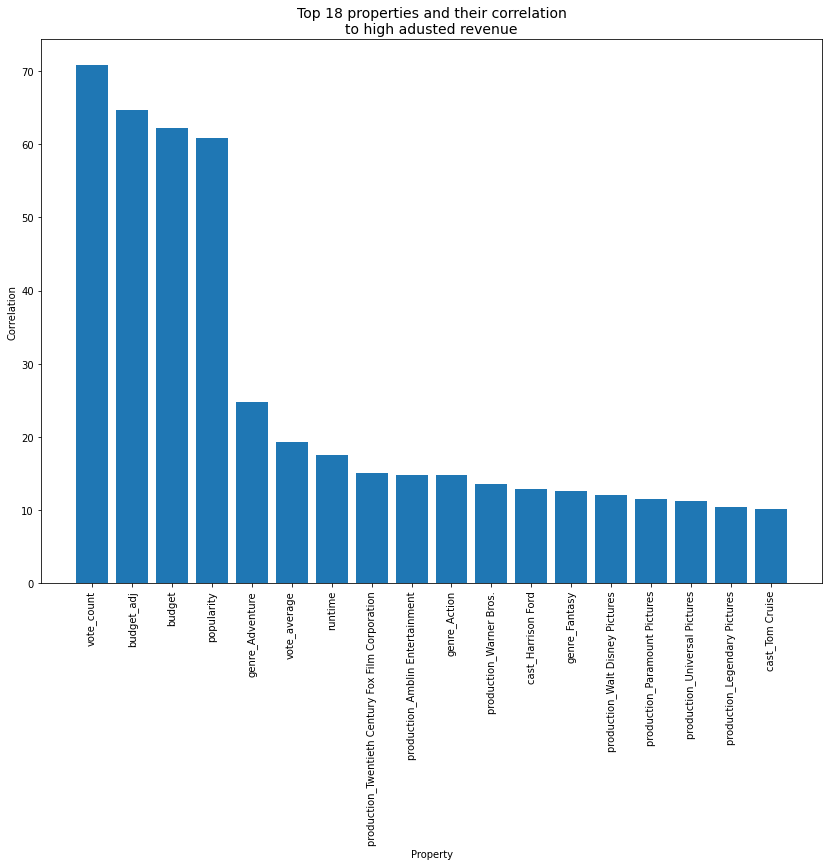

In [25]:
plt.figure(figsize=(14, 10))

plt.bar(correlation_table['property'], correlation_table['correlation_with_revenue_adj'])
plt.title('Top 18 properties and their correlation\nto high adusted revenue', fontsize='14')
plt.xlabel('Property')
plt.ylabel('Correlation')
plt.xticks(correlation_table['property'], rotation=90)

<a id='conclusions'></a>
### Conclusions
This part of the report summarizess and concludes the result from the analysis. The following findings were made:
<li>For Question 1, obviously, Drama genre is the taking the lead.</li>

<li>For the Question two, we can see that different features that weren't readily available from the original dataset are very important for which movies tend to have high revenues.</li>

<li>Production companies like **Twentieth Century Fox Film Corporation** and actors like **Harrison Ford** are slightly good indicators of a movie that may have high revenues.</li>